<a href="https://colab.research.google.com/github/DWSuryo/Javascript-DOM-API-cheatsheet/blob/master/Copy_of_GroupAssignment_ImageEnhancement_Morphology_Foraminifera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Enhancement for Foraminifera Morphology

Goal: improve texture quality of foraminifera fossil

Steps:
1. Segment image to focus on target object
2. Sharpen image to improve texture quality
3. Enhance image to improve image color
4. If there are many methods in a step, compare and evaluate

# Step 0: Setup

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import datetime
import time
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1) #to have reproducible results
pd.set_option('display.max_colwidth', None)

In [ ]:
# # download image
# import urllib
# import urllib.request
# urllib.request.urlretrieve("https://drive.google.com/uc?id=1rshbEPifRdpwLXQ73RsgKD5y43SbNkRg&export=download", "image1.jpg")
# urllib.request.urlretrieve("https://drive.google.com/uc?id=1U2h3wpEJqCR5C6nORpPlZHjxD-0au_QX&export=download", "image2.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# %cd "/content"
!ls

drive  sample_data


## Image

In [ ]:
paths = glob.glob("/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/*.jpg",recursive=True)
print(len(paths))
# print(f"{i}\n" for i in paths)
print(paths)
size = (400,400)
orig = np.array([np.asarray(Image.open(img).resize(size)) for img in paths])
print(orig.shape)

6
['/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/Candeina nitida.jpg', '/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/Sphaeroidinella\xa0dehiscens.jpg', '/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/Turborotalita humilis.jpg', '/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/Globorotalia_tumida.jpg', '/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/Globorotalia scitula.jpg', '/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/worstcases/Globigerina falconensis.jpg']
(6, 400, 400, 3)


In [ ]:
# a = np.asarray(Image.open(paths[5]))
# a.shape

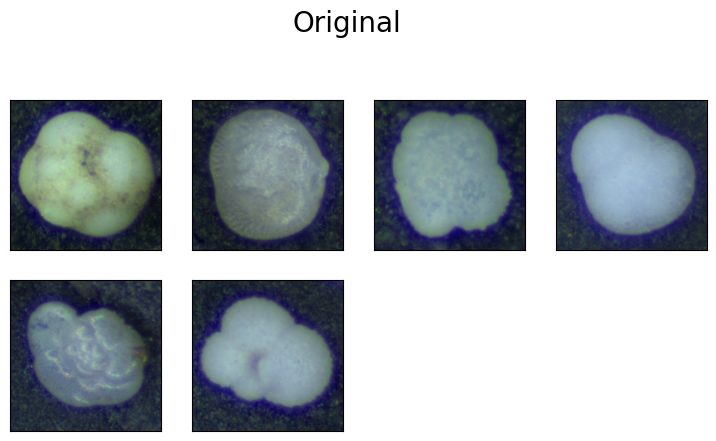

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in orig[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Original", fontsize=20)
plt.show()

In [ ]:
# paths2 = [cv2.imread(img) for img in glob.glob("/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/selection/*.jpg")]
# # print(f"img\n" for img in glob.glob("/content/drive/MyDrive/S2/VisiKomputer_14904/media/foraminifera_group/selection/*.jpg"))
# len(paths2)

In [ ]:
# # alternate method
# paths2_resize = [cv2.resize(img, (400,400)) for img in paths2]
# Hori = np.concatenate(paths2_resize, axis=1)
# plt.figure(figsize=(10,10))
# plt.title("Images")
# plt.axis("off")
# plt.imshow(Hori)

# Step 1: Segmentation

## Attempt 1

https://betterprogramming.pub/image-segmentation-python-7a838a464a84 (modified)

In [ ]:
gray = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in orig])
print(len(gray))
print(np.asarray(gray).shape)

6
(6, 400, 400)


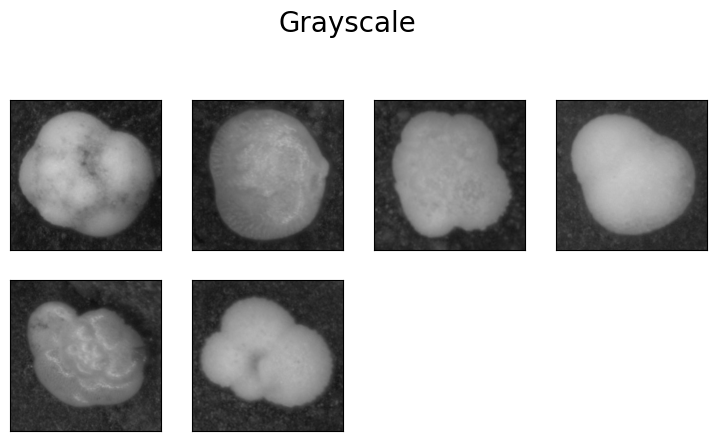

In [ ]:
plt.figure(figsize=(9,9))
for i, img in enumerate(gray[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))
plt.suptitle("Grayscale", fontsize=20)
plt.show()

### Thresholding method

(6, 400, 400)
(400, 400)


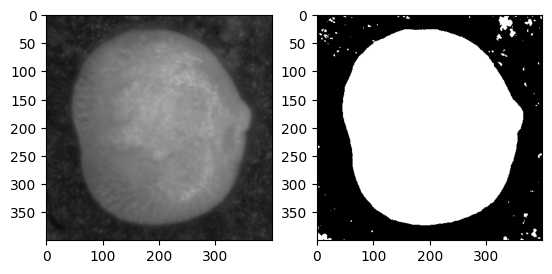

In [ ]:
# Thresholding method
print(gray.shape)
print(gray[1].shape)
# thr_value,thr_image = cv2.threshold(gray[1],np.mean(gray[1]).astype("int"),255,cv2.THRESH_BINARY)

# Calculate mean of reference image
mean_value = np.mean(gray[1]).astype("int")

# Threshold level parameter
lower_threshold = int(mean_value * 0.99)
upper_threshold = 255

# Terapkan threshold adaptif Gaussian

thr_image = cv2.
Threshold(gray[1], upper_threshold, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 755, 3)
# concat = np.concatenate((gray[1],cv2.cvtColor(a,cv2.COLOR_GRAY2RGB)),axis=1)
# print("threshold",thr_image)
# print(t)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(gray[1], cv2.COLOR_GRAY2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(thr_image, cv2.COLOR_GRAY2RGB))

In [ ]:
thresh = [cv2.threshold(img, np.mean(img), 255, cv2.THRESH_BINARY_INV)[1] for img in gray]
print(len(thresh))
print(np.asarray(thresh).shape)
# print(thresh)

6
(6, 400, 400)


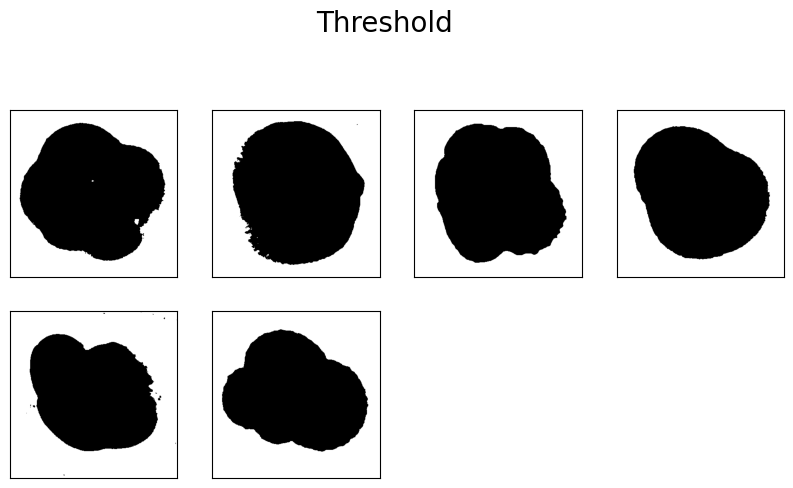

In [ ]:
plt.figure(figsize=(10,10))
for i, thr in enumerate(thresh[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(thr, cv2.COLOR_GRAY2RGB))
plt.suptitle("Threshold", fontsize=20)
plt.show()

In [ ]:
print(len(thresh))
# edges = [cv2.Canny(img, 0, 255) for img in thresh]
edges = [cv2.dilate(cv2.Canny(img, 0, 255), None) for img in thresh]

print(len(edges))
b = np.asarray(edges)
print(b.shape)
# print(b[-1])
# print(b.size)

6
6
(6, 400, 400)


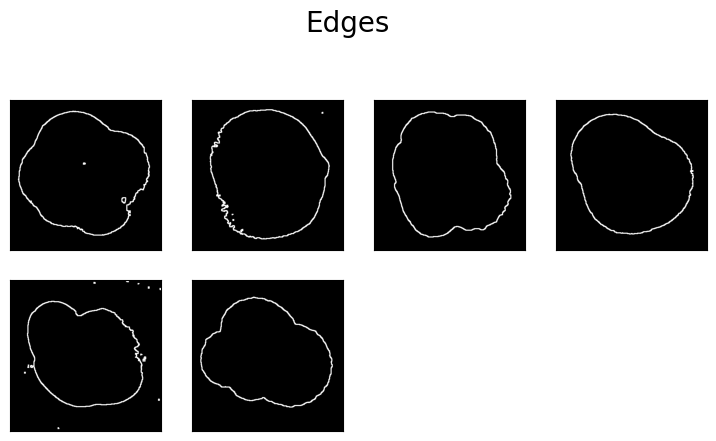

In [ ]:
plt.figure(figsize=(9,9))
for i, edge in enumerate(edges[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(edge, cv2.COLOR_GRAY2RGB))
plt.suptitle("Edges", fontsize=20)
plt.show()

In [ ]:
# cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]

In [ ]:
masked = []
segmented = []
for i, img in tqdm(enumerate(edges)):
    cnt = sorted(cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[-2], key=cv2.contourArea)[-1]
    mask = np.zeros(size, np.uint8)
    masked.append(cv2.drawContours(mask, [cnt],-1, 255, -1))
    dst = cv2.bitwise_and(orig[i], orig[i], mask=mask)
    segmented.append(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

0it [00:00, ?it/s]

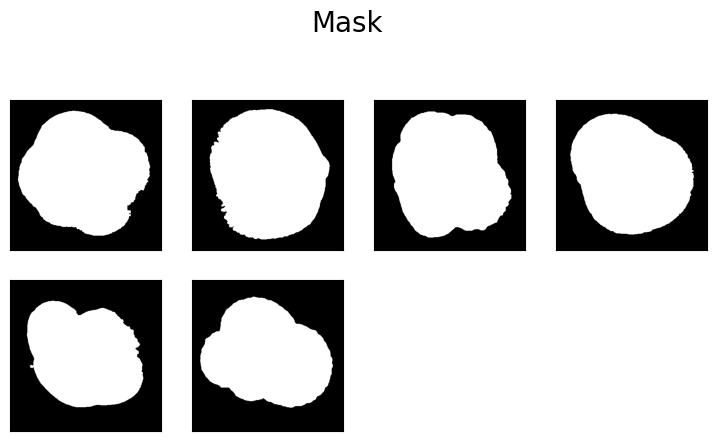

In [ ]:
plt.figure(figsize=(9,9))
for i, maskimg in enumerate(masked[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(maskimg, cmap='gray')
plt.suptitle("Mask", fontsize=20)
plt.show()

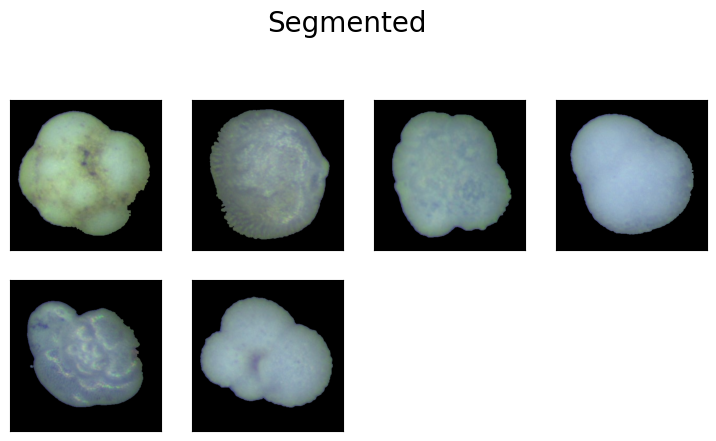

In [ ]:
plt.figure(figsize=(9,9))
for i, segimg in enumerate(segmented[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(segimg, cv2.COLOR_BGR2RGB))
plt.suptitle("Segmented", fontsize=20)
plt.show()

### Plot all the process

In [ ]:
# alternate plotting
Hori_orig = np.concatenate(orig, axis=1)
# plt.figure(figsize=(10,10))
# plt.title("Original")
# plt.axis("off")
# plt.imshow(Hori_orig)

In [ ]:
Hori_gray = np.concatenate(gray, axis=1)
Hori_gray = cv2.cvtColor(Hori_gray,cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
# plt.title("Grayscale")
# plt.axis("off")
# plt.imshow(Hori_gray)

In [ ]:
Hori_thresh = np.concatenate(thresh,axis=1)
Hori_thresh = cv2.cvtColor(Hori_thresh, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
# plt.title("Threshold")
# plt.axis("off")
# plt.imshow(Hori_thresh)

In [ ]:
Hori_dilate_edge = np.concatenate(edges,axis=1)
Hori_dilate_edge = cv2.cvtColor(Hori_dilate_edge, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
# plt.title("Edge + Dilate")
# plt.axis("off")
# plt.imshow(Hori_dilate_edge)

In [ ]:
Hori_mask = np.concatenate(masked,axis=1)
Hori_mask = cv2.cvtColor(Hori_mask, cv2.COLOR_GRAY2RGB)
# plt.figure(figsize=(10,10))
# plt.title("Mask")
# plt.axis("off")
# plt.imshow(Hori_mask)

In [ ]:
Hori_segmented = np.concatenate(segmented,axis=1)
Hori_segmented = cv2.cvtColor(Hori_segmented, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(10,10))
# plt.title("Segmented")
# plt.axis("off")
# plt.imshow(Hori_segmented)

### Result

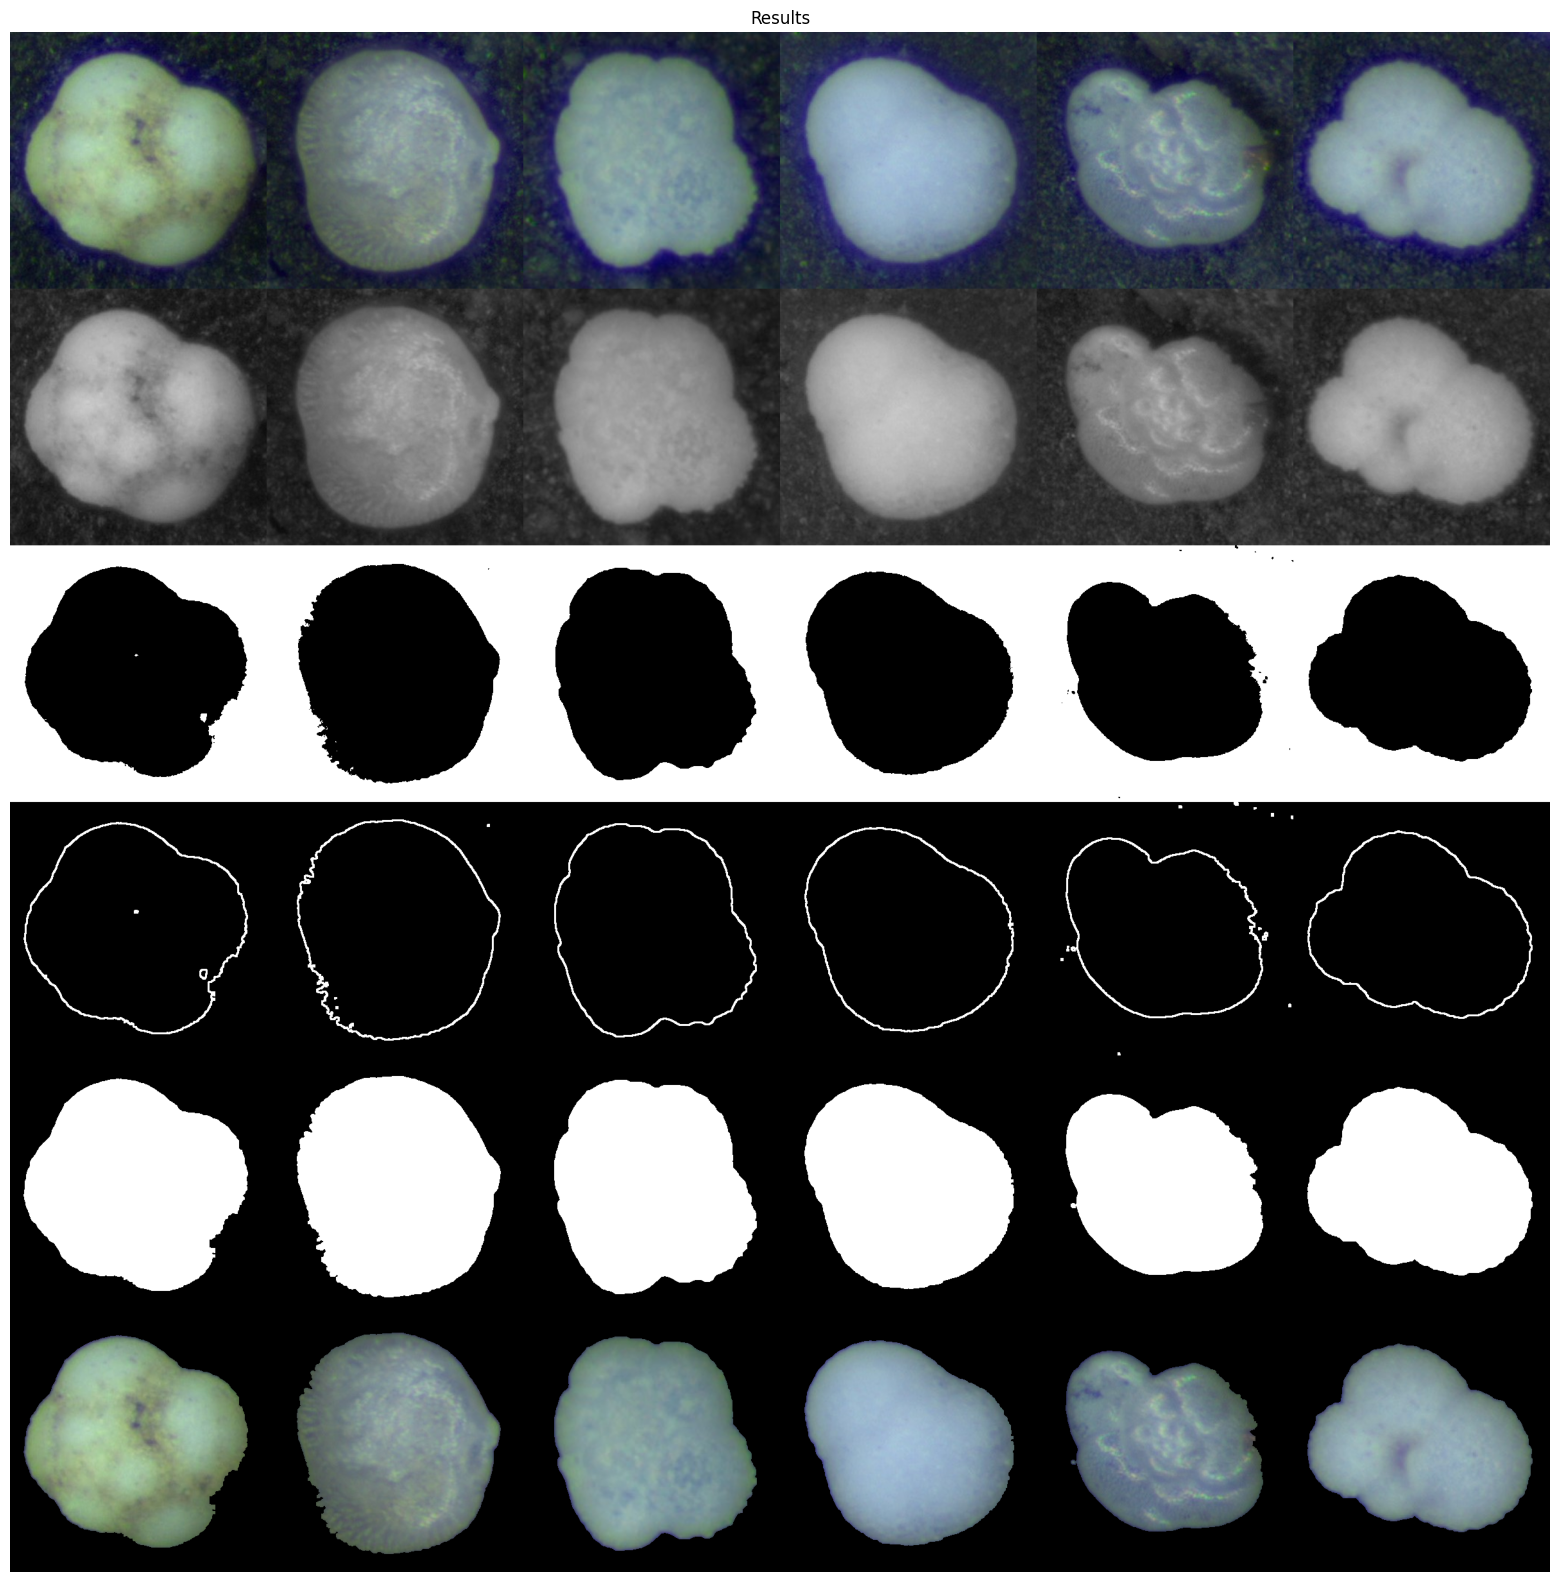

In [ ]:
stack = np.concatenate((Hori_orig,
                        Hori_gray,
                        Hori_thresh,
                        Hori_dilate_edge,
                        Hori_mask,
                        Hori_segmented),
                       axis=0)
plt.figure(figsize=(20,20))
plt.title("Results")
plt.axis("off")
plt.imshow(stack)

# Step 2: Sharpening

## Attempt 1: Unsharp Masking

1. https://santhalakshminarayana.github.io/blog/retinex-image-enhancement
2. https://github.com/soroushj/python-opencv-numpy-example/blob/master/unsharpmask.py

In [ ]:
def get_ksize(sigma):
    # opencv calculates ksize from sigma as
    # sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
    # then ksize from sigma is
    # ksize = ((sigma - 0.8)/0.15) + 2.0

    return int(((sigma - 0.8)/0.15) + 2.0)

def get_gaussian_blur(img, ksize=0, sigma=5):
    # if ksize == 0, then compute ksize from sigma
    if ksize == 0:
        ksize = get_ksize(sigma)

    # Gaussian 2D-kernel can be seperable into 2-orthogonal vectors
    # then compute full kernel by taking outer product or simply mul(V, V.T)
    sep_k = cv2.getGaussianKernel(ksize, sigma)

    # if ksize >= 11, then convolution is computed by applying fourier transform
    return cv2.filter2D(img, -1, np.outer(sep_k, sep_k))

In [ ]:
def unsharp_mask(image, kernel_size=5, sigma=5.0, amount=1.0, threshold=0):
    """Return a sharpened version of the image, using an unsharp mask."""
    # For details on unsharp masking, see:
    # https://en.wikipedia.org/wiki/Unsharp_masking
    # https://homepages.inf.ed.ac.uk/rbf/HIPR2/unsharp.htm
    # or use cv2.GaussianBlur
    blurred = get_gaussian_blur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

True

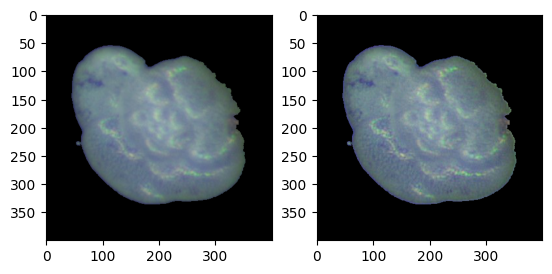

In [ ]:
# writing USM image
usm_input = segmented[4]
usm = unsharp_mask(usm_input,kernel_size=7,sigma=200.0)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(usm_input,cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(usm,cv2.COLOR_BGR2RGB))

cv2.imwrite("sharp_segmented.jpg",usm_input)
cv2.imwrite("sharp_usm.jpg",usm)

In [ ]:
usm_group = [unsharp_mask(i,kernel_size=5,sigma=200.0) for i in segmented]
# plt.figure(figsize=(9,9))
# for i, u in enumerate(usm_group[0:16]):
#     plt.subplot(4,4,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(cv2.cvtColor(u, cv2.COLOR_BGR2RGB))
# plt.suptitle("usm_group", fontsize=20)
# plt.show()

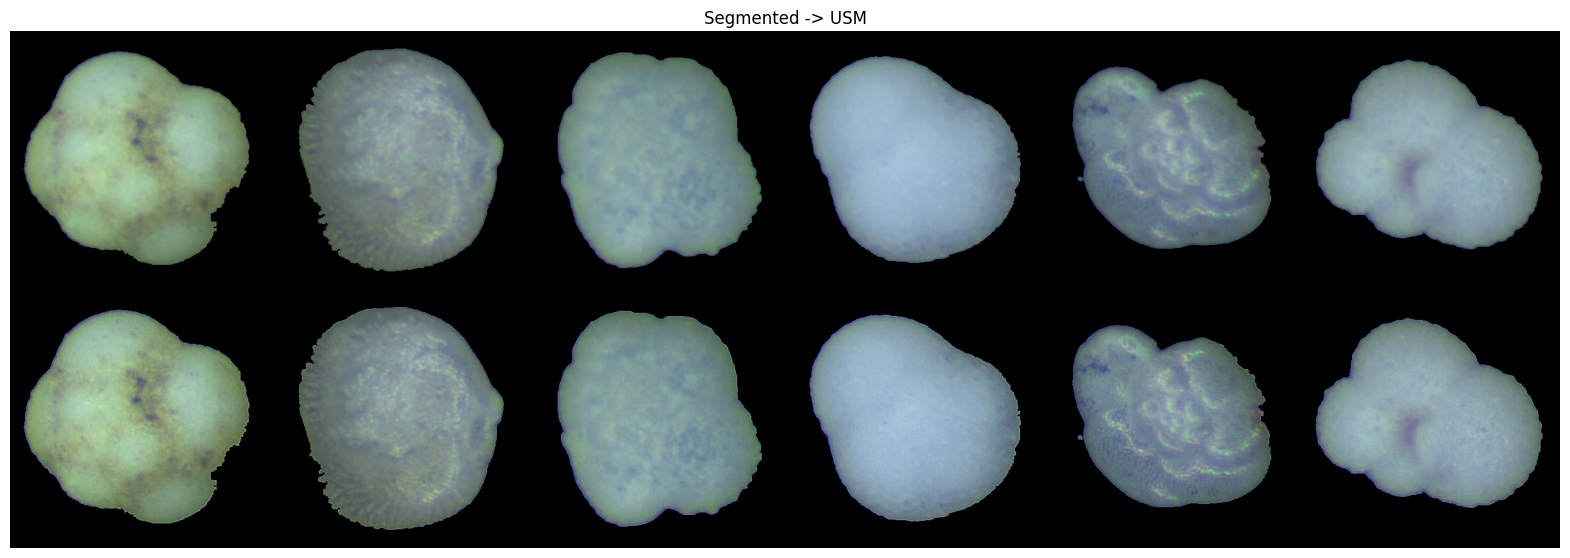

In [ ]:
Hori_usm = cv2.cvtColor(np.concatenate(usm_group, axis=1),cv2.COLOR_BGR2RGB)
compare_segmented_usm = np.concatenate((Hori_segmented,Hori_usm),axis=0)
plt.figure(figsize=(20,20))
plt.title("Segmented -> USM")
plt.axis("off")
plt.imshow(compare_segmented_usm)

In [ ]:
Hori_usm.shape

(400, 2400, 3)

## Attempt 2: Local Laplacian Filter

https://github.com/LSTM-Kirigaya/localaplace

In [ ]:
import math
import os

# import cv2
# import numpy as np
from tqdm import trange
import joblib

class LocalLaplaceFilter:
    def __init__(self, input_image: np.ndarray, kAlphaIn: float, kBetaIn: float, kSigmaRIn: float, skala: int, num_workers: int = 1, verbose: int = 1):
        self.kAlpha = kAlphaIn
        self.kBeta = kBetaIn
        self.kSigmaR = kSigmaRIn
        self.rows = 0
        self.cols = 0
        self.result = 0
        self.color = ''
        self.num_workers = num_workers
        self.verbose = verbose
        self.gaussian_pyramid = []
        self.laplacian_pyramid = []
        self.output_write = []
        self.reconstructed_image = None
        self.width = 0
        self.height = 0
        self.dim = (self.width, self.height)

        # self.input = cv2.imread(self.inputFileName, cv2.IMREAD_UNCHANGED)
        self.input = input_image
        if len(self.input.shape) == 2:
            self.color = 'lum'
        else:
            self.color = 'rgb'
        self.scale_percent = skala  # percent of original size
        self.width = int(math.ceil(self.input.shape[1] * self.scale_percent / 100))
        self.height = int(math.ceil(self.input.shape[0] * self.scale_percent / 100))
        self.dim = (self.width, self.height)
        if self.input is not None:
            self.img_norm2 = self.input.astype(float) / 255.0
            self.img_resized = cv2.resize(self.img_norm2, self.dim, interpolation=cv2.INTER_AREA)
            self.result = 1
        else:
            self.result = 0
        self.num_levels = self.get_num_levels(self.img_resized)

    # number of pyramid levels, as many as possible up 1x1
    def get_num_levels(self, image: np.ndarray) -> int:
        self.rows, self.cols = image.shape[:2]
        min_d = min(self.rows, self.cols)
        nlev = 1
        while min_d > 1:
            nlev = nlev + 1
            min_d = (min_d + 1) // 2
        return nlev

    # 2D for building Gaussian and Laplacian pyramids
    def filter(self):
        a = [.05, .25, .4, .25, .05]
        kernel_1 = np.array(a, np.float64)
        kernel_2 = np.array(kernel_1)[np.newaxis]
        kernel = kernel_2.T
        f = np.multiply(kernel, kernel_1, None)
        return f

    # smooth step edge
    def smooth_step(self, xmin, xmax, x):
        y = (x - xmin) / (xmax - xmin)
        y = np.minimum(y, 1)
        y = np.maximum(y, 0)
        y_1 = np.multiply(y, y - 2)
        y_2 = np.square(y_1)
        return y_2

    # detail remapping function
    def fd(self, d):
        noise_level = float(0.01)
        out = d ** self.kAlpha
        if self.kAlpha < 1.0:
            tau = self.smooth_step(noise_level, 2*noise_level, d*self.kSigmaR)
            out = tau * out + (1-tau) * d
        return out

    # edge remapping function
    def fe(self, a):
        out = self.kBeta * a
        return out

    # color remapping function
    def r_color(self, i, g0, sigma_r):
        g0 = np.tile(g0, [i.shape[0], i.shape[1], 1])
        dnrm = np.sqrt(np.sum((i - g0) ** 2, axis=2))
        eps_dnrm = np.spacing(1) + dnrm
        unit = (i - g0) / np.tile(eps_dnrm[..., None], [1, 1, 3])
        rd = g0 + unit * np.tile(sigma_r * self.fd(dnrm / sigma_r)[..., None], [1, 1, 3])
        re = g0 + unit * np.tile(sigma_r + self.fe(dnrm - sigma_r)[..., None], [1, 1, 3])
        isedge = np.tile((dnrm > sigma_r)[..., None], [1, 1, 3])
        return np.logical_not(isedge) * rd + isedge * re

    # grayscale remapping function
    def r_gray(self, i, g0, sigma_r):
        dnrm = abs(i-g0)
        dsgn = np.sign(i-g0)

        rd = g0 + dsgn*sigma_r*self.fd(dnrm/sigma_r)
        re = g0 + dsgn*(self.fe(dnrm - sigma_r) + sigma_r)

        isedge = dnrm > sigma_r
        return np.logical_not(isedge) * rd + isedge * re

    def remapping(self, image: np.ndarray, gauss: np.ndarray):
        if self.color == 'rgb':
            return self.r_color(image, gauss, self.kSigmaR)
        if self.color == 'lum':
            return self.r_gray(image, gauss, self.kSigmaR)
        return None

    def child_window(self, parent):
        child = parent.copy()

        child[0] = math.ceil((float(child[0]) + 1.0) / 2.0)
        child[2] = math.ceil((float(child[2]) + 1.0) / 2.0)
        child[1] = math.floor((float(child[1]) + 1.0) / 2.0)
        child[3] = math.floor((float(child[3]) + 1.0) / 2.0)
        return child

    def upsample(self, image, subwindow):
        r = int(subwindow[1] - subwindow[0] + 1)
        c = int(subwindow[3] - subwindow[2] + 1)
        if self.color == 'rgb':
            k = image.shape[2]

        reven = int(subwindow[0] % 2 == 0)
        ceven = int(subwindow[2] % 2 == 0)

        if self.color == 'lum':
            R = np.zeros((r, c))
            Z = np.zeros((r, c))
        if self.color == 'rgb':
            R = np.zeros((r, c, k))
            Z = np.zeros((r, c, k))
        kernel = self.filter()

        if self.color == 'lum':
            if R[reven: r: 2, ceven: c: 2].shape != image.shape:
                rslice = slice(reven, r, 2).indices(r)
                cslise = slice(ceven, c, 2).indices(c)
                np.put(R, [rslice, cslise], image.copy())
            else:
                R[reven: r: 2, ceven: c: 2] = image.copy()
            Z[reven : r : 2, ceven : c : 2] = 1.0

        if self.color == 'rgb':
            if R[reven: r: 2, ceven: c: 2, :].shape != image.shape:
                rslice = slice(reven, r, 2).indices(r)
                cslise = slice(ceven, c, 2).indices(c)
                np.put(R, [rslice, cslise], image.copy())
            else:
                R[reven: r: 2, ceven: c: 2, :] = image.copy()
            Z[reven : r : 2, ceven : c : 2, :] = 1.0

        R = cv2.filter2D(R, -1, kernel)
        Z = cv2.filter2D(Z, -1, kernel)
        R /= Z

        return R

    def downsample(self, image: np.ndarray, subwindow: tuple):
        r = image.shape[0]
        c = image.shape[1]

        if not subwindow:
            subwindow = np.arange(r * c).reshape(r, c)
        subwindow_child = self.child_window(subwindow)
        R, Z = None, None
        kernel = self.filter()

        R = cv2.filter2D(image.astype(np.float64), -1, kernel)

        if self.color == 'rgb':
            Z = np.ones([r, c, 3], dtype=np.float64)
        if self.color == 'lum':
            Z = np.ones([r, c], dtype=np.float64)

        Z = cv2.filter2D(Z, -1, kernel)
        R /= Z

        reven = int(subwindow[0] % 2 == 0)
        ceven = int(subwindow[2] % 2 == 0)

        if self.color == 'rgb':
            R = R[reven: r: 2, ceven: c: 2, :]
        if self.color == 'lum':
            R = R[reven: r: 2, ceven: c: 2]

        return R, subwindow_child

    def reconstruct_laplacian_pyramid(self, subwindow=None):
        nlev = self.num_levels
        subwindow_all = np.zeros((nlev, 4))
        if not subwindow:
            subwindow_all[1, :] = [1, self.height, 1, self.cols]
        else:
            subwindow_all[1, :] = subwindow
        for lev in range(2, nlev):
            subwindow_all[lev, :] = self.child_window(subwindow_all[lev - 1, : ])
        R = self.laplacian_pyramid[nlev - 1].copy()
        for lev in range(nlev - 1, 0, -1):
            upsampled = self.upsample(R, subwindow_all[lev, :])
            R = np.add(self.laplacian_pyramid[lev - 1], upsampled)
        return R

    def gauss_pyramid(self, image: np.ndarray, nlev: int, subwindow):
        r = image.shape[0]
        c = image.shape[1]
        if not subwindow:
            subwindow = [1, r, 1, c]
        if not nlev:
            nlev = self.get_num_levels(image)
        pyr = [None] * nlev
        pyr[0] = image.copy()
        for level in range(1, nlev):
            image, _ = self.downsample(image, subwindow)
            pyr[level] = image.copy()
        return pyr

    def laplace_pyramid(self, image: np.ndarray, nlev: int, subwindow: tuple):
        r = image.shape[0]
        c = image.shape[1]
        j_image = []
        if not subwindow:
            subwindow = [1, r, 1, c]
        if not nlev:
            nlev = self.get_num_levels(image)
        pyr = [None] * nlev
        for level in range(0, nlev - 1):
            j_image = image.copy()
            image, subwindow_child = self.downsample(j_image, subwindow)
            upsampled = self.upsample(image, subwindow)
            pyr[level] = j_image - upsampled
            subwindow = subwindow_child.copy()

        pyr[nlev - 1] = j_image
        return pyr

    def compute_laplace_layer(self, level: int):
        hw = 3 * 2 ** level - 2

        guassian_layer = self.gaussian_pyramid[level - 1]
        layer_h, layer_w = guassian_layer.shape[:2]

        Ys, Xs = np.meshgrid(np.arange(layer_h) + 1, np.arange(layer_w) + 1)
        Ys = Ys.flatten()
        Xs = Xs.flatten()

        laplace_layer = np.zeros_like(guassian_layer)

        if level == 1:
            iters = trange(len(Ys), colour='green', leave=False, ncols=80)
        else:
            iters = range(len(Ys))

        for i in iters:
            y = Ys[i]
            x = Xs[i]
            yf = (y - 1) * 2 ** (level - 1) + 1
            xf = (x - 1) * 2 ** (level - 1) + 1

            yrng = [max(1, yf - hw), min(self.dim[1], yf + hw)]
            xrng = [max(1, xf - hw), min(self.dim[0], xf + hw)]

            isub = self.img_resized[yrng[0] - 1:yrng[1], xrng[0] - 1: xrng[1]]

            if self.color == 'lum':
                gauss = guassian_layer[y - 1, x - 1]
            if self.color == 'rgb':
                gauss = guassian_layer[y - 1, x - 1, :]

            img_remapped = self.remapping(isub, gauss)

            l_remap = self.laplace_pyramid(img_remapped, level + 1, [yrng[0], yrng[1], xrng[0], xrng[1]])

            yfc = yf - yrng[0] + 1
            xfc = xf - xrng[0] + 1

            yfclev0 = math.floor((yfc - 1) / 2 ** (level - 1)) + 1
            xfclev0 = math.floor((xfc - 1) / 2 ** (level - 1)) + 1

            if self.color == 'rgb':
                laplace_layer[y - 1, x - 1, :] = l_remap[level - 1][yfclev0 - 1, xfclev0 - 1, :]
            if self.color == 'lum':
                laplace_layer[y - 1, x - 1] = l_remap[level - 1][yfclev0 - 1, xfclev0 - 1]


        return laplace_layer

    def print_message(self, *args, **kwargs):
        if self.verbose >= 1:
            print(*args, **kwargs)

    def local_laplace_filter(self):
        self.gaussian_pyramid = self.gauss_pyramid(self.img_resized, None, None)
        self.print_message('[√] Build Gaussian Pyramid')
        self.laplacian_pyramid = self.gaussian_pyramid.copy()

        if self.num_workers == 1:
            self.print_message('[√] Dispatch One CPU')
            for level in trange(1, self.num_levels, colour='green', ncols=80):
                laplace_layer = self.compute_laplace_layer(level)
                self.laplacian_pyramid[level - 1] = laplace_layer
        else:
            self.print_message(f'[√] Dispatch {os.cpu_count()} CPUs')
            parallel = joblib.Parallel(n_jobs=self.num_workers)
            laplace_layers = parallel(
                joblib.delayed(self.compute_laplace_layer)(level)
                for level in range(1, self.num_levels)
            )
            for i, layer in enumerate(laplace_layers):
                self.laplacian_pyramid[i] = layer

        self.print_message('[√]', 'Build Laplacian Pyramid')
        out = self.reconstruct_laplacian_pyramid()
        self.print_message('[√]', 'Rebuild Output Image')
        return out

def local_laplace_filter(image: np.ndarray, kAlphaIn: float = 0.2, kBetaIn: float = 0.5, kSigmaRIn: float = 0.8,
                         skala: int = 100, num_workers: int = 1, verbose: int = 0, return_layers: bool = False) -> np.ndarray:
    """Implement of Local Laplace Filter
    From paper [Local Laplacian filters: Edge-aware image processing with a Laplacian pyramid.](http://people.csail.mit.edu/hasinoff/pubs/ParisEtAl11-lapfilters-lowres.pdf)

    Parameters
    ----------
    image : numpy array
        input image, support both `color` and `gray` type of image.
    kAlphaIn: float
        default is `0.2`
    kBetaIn: float
        default is `0.5`
    kSigmaRIn: float
        default is `0.8`
    skala: int
        scale factor, default is `10`, represent size of input
        image will be resize to 10% of original
    num_workers : int
        number of cpu to do the transform, default is `1`.
        You can set -1 to dispatch all the cpus.
    verbose: int
        level to print the message, set it to `1` to print message
        after each stage of transform, default is `0`.
    return_layers: bool
        If true, will return the each laplace layers during the first step.
        Default is false
    Returns
    -------
    result : numpy array
        result after transform
    """
    if len(image.shape) >= 3:
        image = image[..., : 3]
    lp_filter = LocalLaplaceFilter(image, kAlphaIn, kBetaIn, kSigmaRIn, skala, num_workers, verbose)
    output = lp_filter.local_laplace_filter()
    result = np.clip(output * 255, 0, 255)

    if return_layers:
        layers = lp_filter.laplacian_pyramid
        layers = [np.clip(l * 255, 0, 255) for l in layers]
        return result, layers
    else:
        return result

In [ ]:
from time import time

# image = cv2.imread('./Copy of MD022508-0-0-B_seminuda-6247_resized.jpg', cv2.IMREAD_UNCHANGED)

s = time()

output_llf = []
layer_llf = []
for seg in segmented:

  result, layers = local_laplace_filter(
      seg, 0.2, 0.5, 0.4, 100,
      num_workers=-1,
      verbose=1,
      return_layers=True
  )
  output_llf.append(result)
  layer_llf.append(layers)
cost_time = round(time() - s, 4)
print('cost time: {} s'.format(cost_time))

[√] Build Gaussian Pyramid
[√] Dispatch 2 CPUs
[√] Build Laplacian Pyramid
[√] Rebuild Output Image
[√] Build Gaussian Pyramid
[√] Dispatch 2 CPUs
[√] Build Laplacian Pyramid
[√] Rebuild Output Image
[√] Build Gaussian Pyramid
[√] Dispatch 2 CPUs
[√] Build Laplacian Pyramid
[√] Rebuild Output Image
[√] Build Gaussian Pyramid
[√] Dispatch 2 CPUs
[√] Build Laplacian Pyramid
[√] Rebuild Output Image
[√] Build Gaussian Pyramid
[√] Dispatch 2 CPUs
[√] Build Laplacian Pyramid
[√] Rebuild Output Image
[√] Build Gaussian Pyramid
[√] Dispatch 2 CPUs
[√] Build Laplacian Pyramid
[√] Rebuild Output Image
cost time: 375.1745 s


In [ ]:
output_llf_np = np.asarray(output_llf).astype("uint8")
print(output_llf_np.shape)

(6, 400, 400, 3)


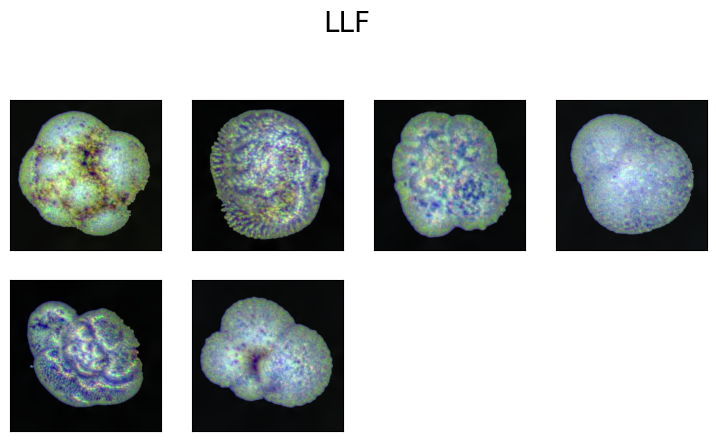

In [ ]:
plt.figure(figsize=(9,9))
for i, out in enumerate(output_llf_np[0:16]):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.suptitle("LLF", fontsize=20)
plt.show()

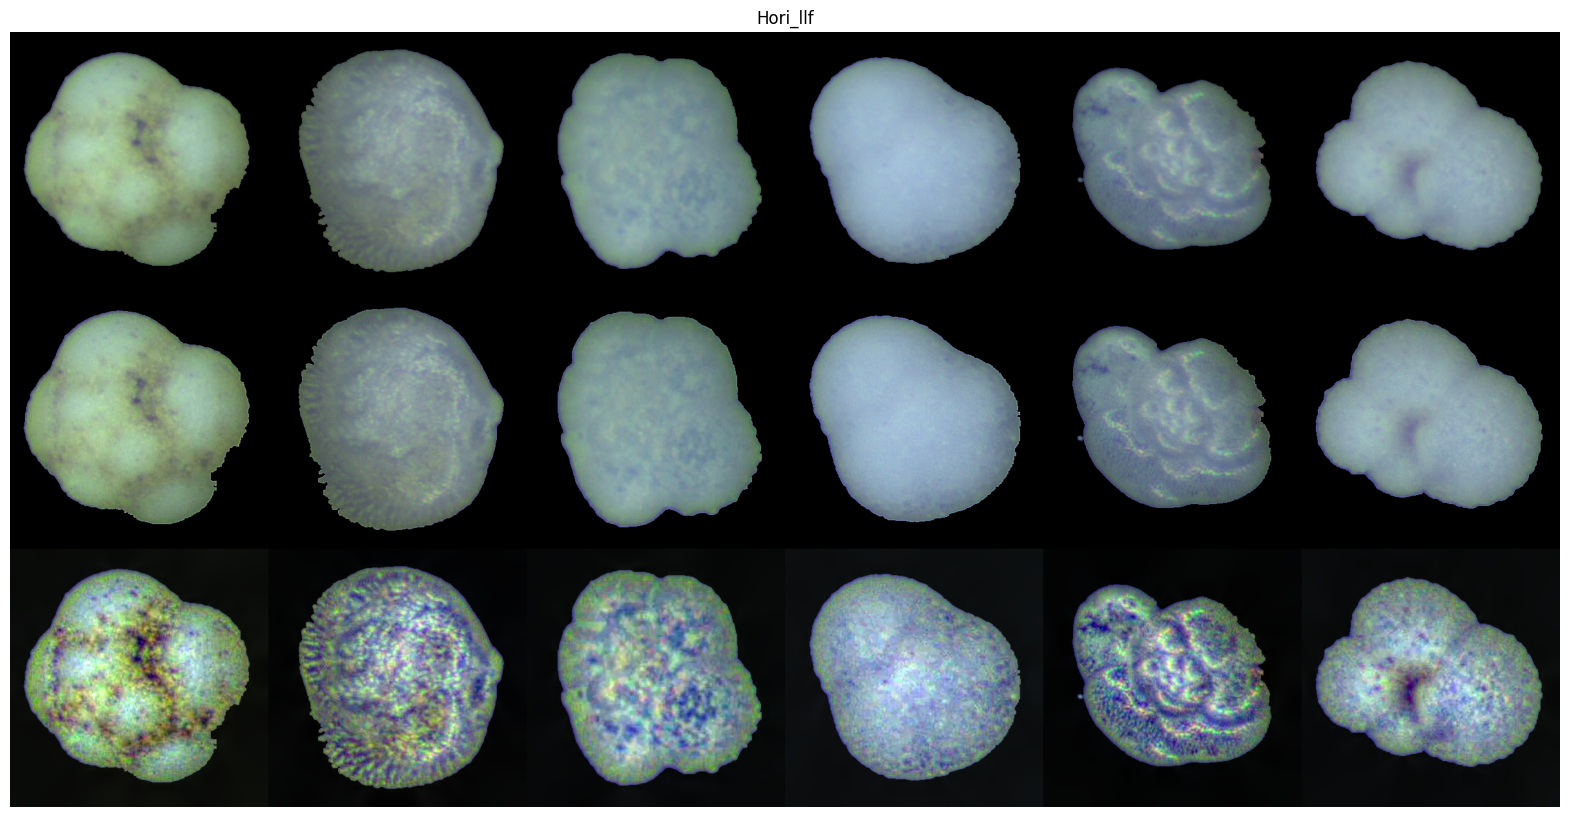

In [ ]:
Hori_llf = cv2.cvtColor(np.concatenate(output_llf_np, axis=1),cv2.COLOR_BGR2RGB)
compare_full = np.concatenate((compare_segmented_usm,Hori_llf),axis=0)
plt.figure(figsize=(20,20))
plt.title("Hori_llf")
plt.axis("off")
plt.imshow(compare_full)

In [ ]:
cv2.imwrite("sharp_llf.jpg",output_llf_np[4])

True

# Step 3: Image Enhancement

## Grayscale images

In [ ]:
index_compare = 0
gray_segmented = cv2.cvtColor(segmented[index_compare], cv2.COLOR_BGR2GRAY)
gray_usm = cv2.cvtColor(usm_group[index_compare], cv2.COLOR_BGR2GRAY)
gray_llf = cv2.cvtColor(output_llf_np[index_compare], cv2.COLOR_BGR2GRAY)
# gray_llf_he_conv = np.round(gray_llf_he*255).astype("uint8")
# image_eq_ahe_conv = np.round(image_eq_ahe*255).astype("uint8")
# print(gray_segmented.shape)

##  Attempt 1: Histogram Equalization (HE, AHE)

In [ ]:
from skimage.io import imread
from skimage import exposure

In [ ]:
# Applying Adaptive Histogram Equalization
# index_compare = 0
# image_llf_gray = cv2.cvtColor(output_llf_np[index_compare], cv2.COLOR_BGR2GRAY) # change to gray_llf

# Apply global histogram equalization
# gray_llf_he
gray_usm_he = exposure.equalize_hist(gray_usm)
gray_llf_he = exposure.equalize_hist(gray_llf)
# gray_llf_he converted
gray_usm_he_conv = np.round(gray_usm_he*255).astype("uint8")
gray_llf_he_conv = np.round(gray_llf_he*255).astype("uint8")

# Adaptive HE
clip_limit = 0.03
nbins = 20
kernel_size = (3, 3)
gray_usm_ahe = exposure.equalize_adapthist(gray_usm, clip_limit=0.03, nbins=nbins, kernel_size=kernel_size)
gray_llf_ahe = exposure.equalize_adapthist(gray_llf, clip_limit=0.03, nbins=nbins, kernel_size=kernel_size)  # Adaptive HE

# AHE converted
gray_usm_ahe_conv = np.round(gray_usm_ahe*255).astype("uint8")
gray_llf_ahe_conv = np.round(gray_llf_ahe*255).astype("uint8")

print(output_llf_np[index_compare].shape)
print(gray_llf.shape)
print(gray_llf_ahe.shape)
print(gray_llf_ahe.min(), gray_llf_ahe.mean(), gray_llf_ahe.max())
# gray_llf_ahe_color = cv2.cvtColor(np.array(gray_llf_ahe).astype("uint8"), cv2.COLOR_GRAY2RGB)
# print(gray_llf_ahe_color.shape)

# # Plotting the result
# fig, axes = plt.subplots(1, 4, figsize=(12, 4), sharex=True, sharey=True)
# axes[0].imshow(gray[index_compare], cmap=plt.cm.gray)
# axes[0].set_title('Original Image')
# axes[1].imshow(gray_segmented, cmap=plt.cm.gray)
# axes[1].set_title('Segmented Image')
# axes[2].imshow(gray_llf_he, cmap=plt.cm.gray)
# axes[2].set_title('Equalized Image (HE)')
# axes[3].imshow(gray_llf_ahe, cmap=plt.cm.gray)
# axes[3].set_title('Adaptive Equalization (AHE)')
# for ax in axes:
#     ax.axis('off')
# plt.tight_layout()
# plt.show()

(400, 400, 3)
(400, 400)
(400, 400)
0.0 0.37769970988120577 1.0


## Attempt 2: Retinex (Single Scale, Multi Scale)

source:

1. https://santhalakshminarayana.github.io/blog/retinex-image-enhancement
2. https://www.ipol.im/pub/art/2014/107/

In [ ]:
from scipy.ndimage import gaussian_filter

def retinex(image, sigma):
    # Apply Gaussian smoothing
    image_log = np.log(image.astype(np.float32) + 1)
    image_log_smoothed = gaussian_filter(image_log, sigma)

    # Subtract smoothed image from original to get the detail
    detail = image_log - image_log_smoothed

    # Combine detail with smoothed image
    result = np.exp(detail) - 1

    # Normalize the result
    result = exposure.rescale_intensity(result, out_range=(0, 1))

    return result

def retinex_msr(image, sigma_list):
    # Apply Multi-Scale Retinex (MSR)
    retinex = np.zeros_like(image, dtype=np.float32)  # normalize into float32 [0,1] scale
    for sigma in sigma_list:
        # Apply Gaussian smoothing
        image_log = np.log(image.astype(np.float32) + 1)
        image_log_smoothed = gaussian_filter(image_log, sigma)

        # Subtract smoothed image from original to get the detail
        detail = image_log - image_log_smoothed

        # Combine detail with smoothed image
        result = np.exp(detail) - 1

        # Normalize the result
        result = exposure.rescale_intensity(result, out_range=(0, 1))

        # Accumulate results from different scales
        retinex += result

    retinex /= len(sigma_list)

    return retinex

In [ ]:
# Applying Retinex
# Retinex sigma
ssr_sigma = 50
msr_sigma = [15, 80,300]
# Single Scale Retinex
gray_usm_ssr = retinex(gray_usm, sigma=ssr_sigma)
gray_llf_ssr = retinex(gray_llf, sigma=ssr_sigma)
# Multi Scale Retinex
gray_usm_msr = retinex_msr(gray_usm, sigma_list=msr_sigma)
gray_llf_msr = retinex_msr(gray_llf, sigma_list=msr_sigma)

gray_usm_ssr_conv = np.round(gray_usm_ssr*255).astype("uint8")
gray_llf_ssr_conv = np.round(gray_llf_ssr*255).astype("uint8")
gray_usm_msr_conv = np.round(gray_usm_msr*255).astype("uint8")
gray_llf_msr_conv = np.round(gray_llf_msr*255).astype("uint8")

# print(gray_usm_ssr_conv.shape, gray_usm_ssr_conv.dtype)

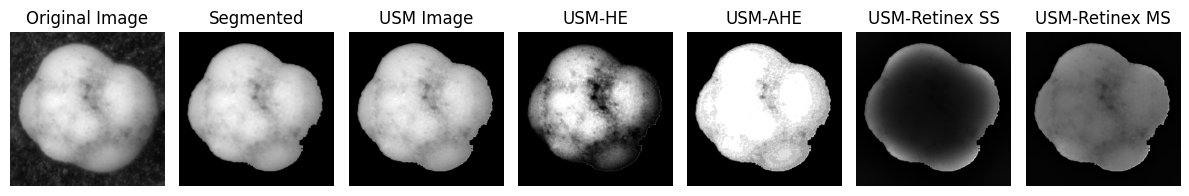

In [ ]:
# USM enhancement comparison
titles_usm = ['Original Image', 'Segmented', 'USM Image', 'USM-HE', 'USM-AHE', 'USM-Retinex SS', 'USM-Retinex MS']
images_usm = [gray[index_compare], gray_segmented, gray_usm, gray_usm_he, gray_usm_ahe, gray_usm_ssr, gray_usm_msr]

# Plotting the result
# plt.figure()
fig, axes = plt.subplots(1, len(titles_usm), figsize=(12, 4), sharex=True, sharey=True)
for ax, title, image in zip(axes, titles_usm, images_usm):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

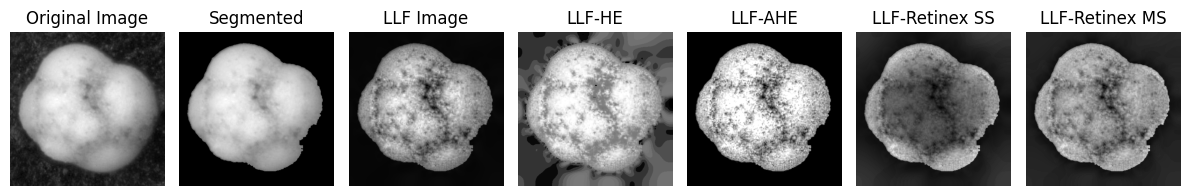

In [ ]:
# LLF enhancement comparison
titles_llf = ['Original Image', 'Segmented', 'LLF Image', 'LLF-HE', 'LLF-AHE', 'LLF-Retinex SS', 'LLF-Retinex MS']
images_llf = [gray[index_compare], gray_segmented, gray_llf, gray_llf_he, gray_llf_ahe, gray_llf_ssr, gray_llf_msr]

# Plotting the result
# plt.figure()
fig, axes = plt.subplots(1, len(titles_llf), figsize=(12, 4), sharex=True, sharey=True)
for ax, title, image in zip(axes, titles_llf, images_llf):
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title(title)
    ax.axis('off')

plt.tight_layout()
plt.show()

# Step 4: Compare and Evaluate

## Quantitative evaluation

- https://pyimagesearch.com/2014/09/15/python-compare-two-images/
- https://www.geeksforgeeks.org/python-peak-signal-to-noise-ratio-psnr/

Progress:

1. Mean Squared Error (MSE)
2. Root Mean Squared Error (RMSE)
3. Peak Signal to Noise Ratio (PSNR)
4. Structural Similarity Index Measure (SSIM)

In [ ]:
from skimage.metrics import structural_similarity as ssim

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])

	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

def psnr(original, compressed):
    mean_square = mse(original,compressed)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * math.log10(max_pixel / math.sqrt(mean_square))
    return psnr

def metrics_images(imageA, imageB):
  result_mse = mse(imageA, imageB)
  result_rmse = math.sqrt(result_mse) # RMSE
  result_psnr = psnr(imageA, imageB)  # PSNR
  result_ssim = ssim(imageA, imageB)
  return result_mse, result_rmse, result_psnr, result_ssim

def compare_images(imageA, imageB, title1, title2):
  # compute the mean squared error and structural similarity
  # index for the images
  result_mse = mse(imageA, imageB)
  result_rmse = math.sqrt(result_mse) # RMSE
  result_psnr = psnr(imageA, imageB)  # PSNR
  result_ssim = ssim(imageA, imageB)
  # setup the figure
  fig = plt.figure()
  plt.suptitle(f"MSE: {result_mse:.2f}, RMSE: {result_rmse:.2f},\n PSNR: {result_psnr:.2f}, SSIM: {result_ssim:.2f}")
  # show first image
  ax = fig.add_subplot(1, 2, 1)
  plt.title(title1)
  plt.imshow(imageA, cmap = plt.cm.gray)
  plt.axis("off")
  # show the second image
  ax = fig.add_subplot(1, 2, 2)
  plt.title(title2)
  plt.imshow(imageB, cmap = plt.cm.gray)
  plt.axis("off")
  # show the images
  plt.show()
  return result_mse, result_rmse, result_psnr, result_ssim

(400, 400) uint8
(400, 400) uint8
(400, 400) uint8
(400, 400) uint8
(400, 400) uint8


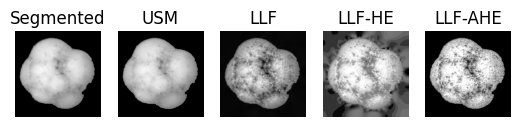

In [ ]:
# convert the images to grayscale
# index_compare = 1
gray_segmented = cv2.cvtColor(segmented[index_compare], cv2.COLOR_BGR2GRAY)
gray_usm = cv2.cvtColor(usm_group[index_compare], cv2.COLOR_BGR2GRAY)
gray_llf = cv2.cvtColor(output_llf_np[index_compare], cv2.COLOR_BGR2GRAY)
gray_llf_he_conv = np.round(gray_llf_he*255).astype("uint8")
gray_llf_ahe_conv = np.round(gray_llf_ahe*255).astype("uint8")
def gray_none(img):
  pass

print(gray_segmented.shape, gray_segmented.dtype)
print(gray_usm.shape, gray_usm.dtype)
print(gray_llf.shape, gray_llf.dtype)
print(gray_llf_he_conv.shape, gray_llf_he_conv.dtype)
print(gray_llf_ahe_conv.shape, gray_llf_ahe_conv.dtype)

# initialize the figure
fig = plt.figure("Images")
images = ("Segmented", gray_segmented), ("USM", gray_usm), ("LLF", gray_llf), ("LLF-HE", gray_llf_he), ("LLF-AHE", gray_llf_ahe)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, len(images), i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
# compare_images(gray_segmented, gray_segmented, "Original vs. Original")
# gray_usm_result = compare_images(gray_segmented, gray_usm, "Segmented", "USM")
# gray_llf_result = compare_images(gray_segmented, gray_llf, "Segmented", "LLF")
# gray_llf_he_result = compare_images(gray_segmented, gray_llf_he_conv, "Segmented", "LLF-HE")
# gray_llf_ahe_result = compare_images(gray_segmented, gray_llf_ahe_conv, "Segmented", "LLF-AHE")

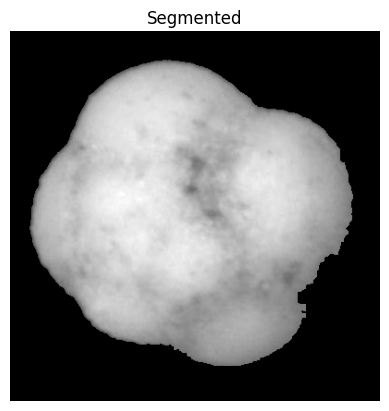

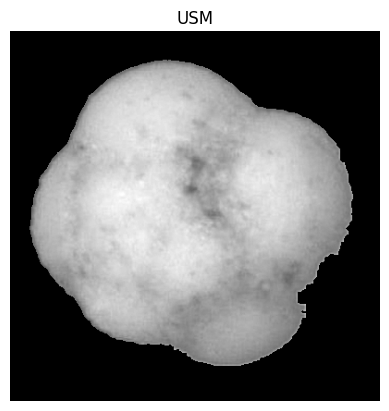

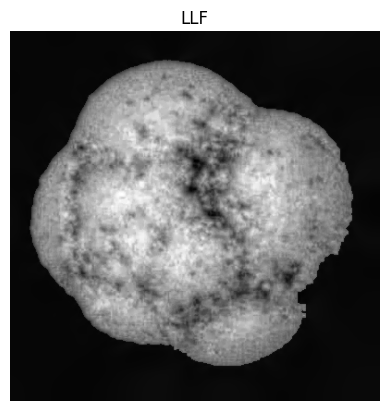

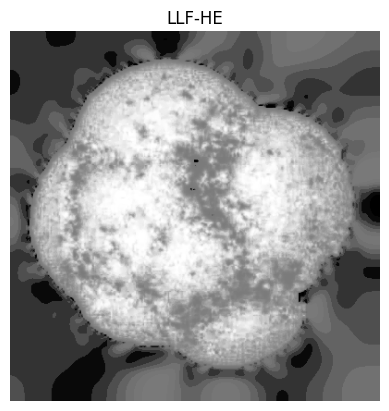

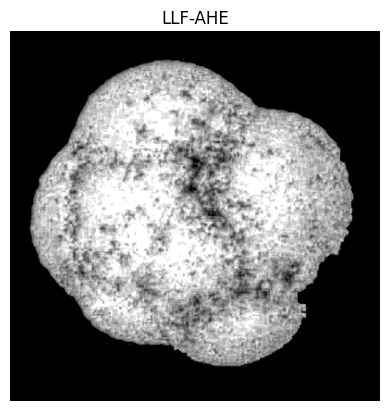

In [ ]:
def single_image(name,image):
  plt.figure()
  plt.title(name)
  plt.axis("off")
  plt.imshow(image, cmap="gray")

for i, (name, image) in enumerate(images):
  single_image(name,image)

## Make a table of methods

https://towardsdatascience.com/create-an-empty-pandas-df-one-row-at-a-time-61b770476bae

In [ ]:
import pandas as pd
import random

gray_usm_none = gray_usm
gray_llf_none = gray_llf

In [ ]:
cols = ['Method','MSE','RMSE','PSNR','SSIM']

sharpen_array = np.array(['USM','LLF'])
enhance_array = np.array(['None','HE','AHE','SSR','MSR'])
x, y = np.meshgrid(sharpen_array, enhance_array)
comb_array = np.array([x.ravel(), y.ravel()]).T
# create index
df_method = [f"{i}-{j}" for i,j in comb_array] # index

# gray_combinations = []
# for i in range(len(comb_array)):
#   # print(f"gray_{comb_array[i][0].lower()}_{comb_array[i][1].lower()}")
#   gray_combinations.append(f"gray_{comb_array[i][0].lower()}_{comb_array[i][1].lower()}")
# print(gray_combinations)

gray_combinations = [
    gray_usm_none,
    gray_llf_none,
    gray_usm_he_conv,
    gray_llf_he_conv,
    gray_usm_ahe_conv,
    gray_llf_ahe_conv,
    gray_usm_ssr_conv,
    gray_llf_ssr_conv,
    gray_usm_msr_conv,
    gray_llf_msr_conv
]

data = []
for i,j in zip(range(len(df_method)), gray_combinations):
  res = metrics_images(gray_segmented, j)
  stats = {
      'Method': df_method[i],
      'MSE': res[0],
      'RMSE': res[1],
      'PSNR': res[2],
      'SSIM': res[3]
  }
  data.append(stats)

df1 = pd.DataFrame(data, columns=cols)
# df1.set_index(['Method'], inplace=True)
df1

Method          MSE       RMSE       PSNR      SSIM
0  USM-None     8.111987   2.848155  39.039531  0.987026
1  LLF-None   284.747169  16.874453  23.586209  0.357567
2    USM-HE  8169.060269  90.382854   9.009083  0.458508
3    LLF-HE  4142.639331  64.363338  11.958032  0.307696
4   USM-AHE  3195.367900  56.527585  13.085595  0.771177
5   LLF-AHE  1220.142769  34.930542  17.266697  0.613101
6   USM-SSR  6898.840562  83.059259   9.743043  0.419889
7   LLF-SSR  2969.566144  54.493726  13.403874  0.329548
8   USM-MSR  2027.470194  45.027438  15.061259  0.662662
9   LLF-MSR  1433.794225  37.865475  16.565935  0.360835

In [ ]:
for i in gray_combinations:
  print(i.dtype)

uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


## Download images

In [ ]:
gray_combinations_str = [
    "gray_usm_none",
    "gray_llf_none",
    "gray_usm_he",
    "gray_llf_he",
    "gray_usm_ahe",
    "gray_llf_ahe",
    "gray_usm_ssr",
    "gray_llf_ssr",
    "gray_usm_msr",
    "gray_llf_msr"
]
gray_combinations_str

['gray_usm_none',
 'gray_llf_none',
 'gray_usm_he',
 'gray_llf_he',
 'gray_usm_ahe',
 'gray_llf_ahe',
 'gray_usm_ssr',
 'gray_llf_ssr',
 'gray_usm_msr',
 'gray_llf_msr']

In [ ]:
for i,j in zip(gray_combinations_str, gray_combinations):
  cv2.imwrite(f"{i}.jpg",j)

In [ ]:
# gray_usm_none

##  Histogram

Compare color histogram from original image against modified images

https://pyimagesearch.com/2021/04/28/opencv-image-histograms-cv2-calchist/

### Attempt 1: Grayscale histogram

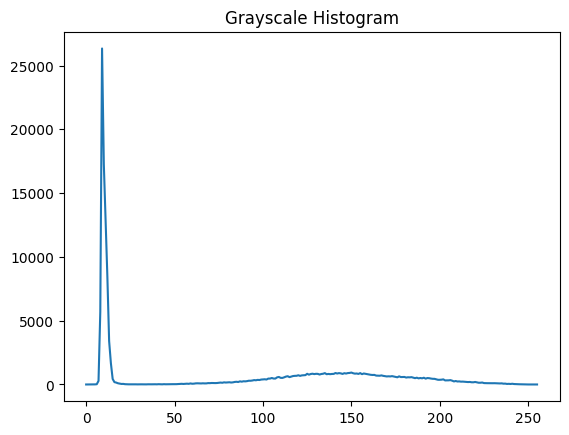

In [ ]:
# alternative way to find histogram of an image
histr = cv2.calcHist([cv2.cvtColor(output_llf_np[0],cv2.COLOR_BGR2GRAY)],[0],None,[256],[1,256])

# show the plotting graph of an image
plt.title("Grayscale Histogram")
plt.plot(histr)
plt.show()

<ipython-input-120-1ed762dac5b3>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,2)


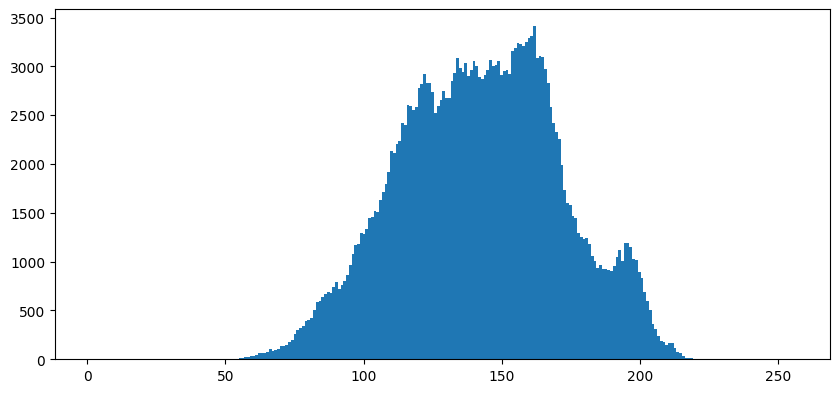

In [ ]:
plt.figure(figsize=(10,10))

plt.subplot(1,1,1)
plt.imshow(segmented[0])
plt.subplot(2,1,2)
plt.hist(segmented[0].ravel(),256,[1,256])
plt.show()

### Attempt 2: Color histogram

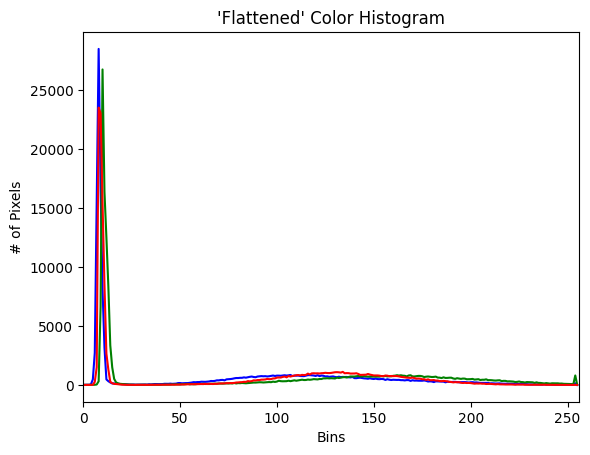

In [ ]:
chans = cv2.split(output_llf_np[0])
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [1, 256])
	plt.plot(hist, color=color)
	plt.xlim([0, 256])